# data acquisition / processing homework 3

> I pledge my Honor that I have abided by the Stevens Honor System. - Joshua Schmidt 3/6/21


## Part 1:  Understanding the ROC curve. 
 
Given below logistic regression probabilities and the ground-truth classifications. Plot the ROC curve via calculating the TruePositive rate vs. FalsePositive rate.


In [11]:
# imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

   true positive rate  false positive rate
0                 1.0                  0.0
1                 1.0                  0.0
2                 1.0                  0.2
3                 1.0                  0.2
4                 1.0                  0.2


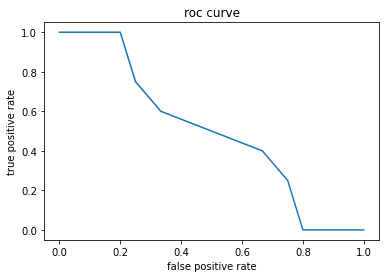

In [28]:
probabilities = np.array([0.967, 0.448, 0.568, 0.879, 0.015, 0.780, 0.978, 0.004], dtype=np.float32)
classifications = np.array([1, 0, 1,  0, 1, 0, 1, 0], dtype=np.int)

data = []

for threshold in np.linspace(0.0, 1.0, num=100):
    true_pos, false_pos = 0, 0
    true_neg, false_neg = 0, 0
    for i, _ in enumerate(probabilities):
        if classifications[i] == 1:
            if probabilities[i] >= threshold:
                true_pos += 1
            else:
                false_pos += 1
        else:
            if probabilities[i] <= 1 - threshold:
                true_neg += 1
            else:
                false_neg += 1
    false_pos_rate = false_pos / (false_pos + true_neg)
    true_pos_rate = true_pos / (true_pos + false_neg)
    data.append((true_pos_rate, false_pos_rate))

df = pd.DataFrame(data=data, columns=['true positive rate', 'false positive rate'])
print(df.head())
roc_curve = sns.lineplot(data=df, x='false positive rate', y='true positive rate')
roc_curve.set_title('roc curve')
roc_curve.set(xlabel='false positive rate', ylabel='true positive rate')
plt.show()
